<a href="https://colab.research.google.com/github/Mohamed-Harish-M-123/Capstone-Project-II/blob/main/TED_Talks_views_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name: TED Talks views prediction

Project Type: Machine Learning - Regression

Name: MOHAMED HARISH

Contribution: Individual

## Project Summary:
TED (Technology, Entertainment, Design) Talks are a series of influential and inspiring talks given by experts and thought leaders from a wide range of fields. The talks are typically 18 minutes or less and are designed to share innovative ideas, spark conversation, and foster learning.

TED Talks began in 1984 as a conference where experts from the fields of technology, entertainment, and design could come together to share their ideas. Since then, the TED conference has expanded to cover a wide range of topics, including science, business, education, and more.

The aim of this project is to develop a machine learning model that can predict the number of views a video uploaded to the TEDx website is likely to receive. The TEDx platform hosts a vast collection of informative and thought-provoking talks from a diverse range of speakers. The prediction model will help the organizers and the speakers to determine the impact of their talks and to optimize the success of future uploads.


## GitHub Link:

#### https://github.com/Mohamed-Harish-M-123/Capstone-Project-II

## Problem Statement:

  The problem statement for this project is to develop a regression model that can accurately predict the number of views that a TEDx talk video will receive on the website. To achieve this, we will need to collect a dataset of TEDx talk videos, along with their respective view counts, and use this data to train and test the regression model.

We will need to consider a variety of factors that may influence the view count of a video, such as the topic of the talk, the speaker's profile, the length of the video, and the language of the talk. We will use feature engineering techniques to extract relevant features from the data and use various regression algorithms to build the prediction model.

The success of the project will be evaluated based on the model's accuracy in predicting the view count of TEDx talk videos.

## Importing Libraries

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss


## Let's load our dataset

In [2]:
# mount our drive to colab

drive.mount('/content/drive')

path = '/content/drive/MyDrive/dataset/data_ted_talks.csv'

df = pd.read_csv(path)

Mounted at /content/drive


In [3]:
df.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


## Let's summarize our dataset
 

In [4]:
# Create a copy of the original data frame.

ted_talks_dataframe = df.copy()


In [5]:
# Check the shape

ted_talks_dataframe.shape

(4005, 19)

In [6]:
# Check the dataframe info

ted_talks_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [7]:
# Check for the null values

nullValues = ted_talks_dataframe.isnull().sum()

print(nullValues)

print("\nTotal Null values in this dataframe = ", nullValues.sum())

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

Total Null values in this dataframe =  1685


In [8]:
# Check for duplicate records or instances

print("Number of duplicate records in the dataset = ", ted_talks_dataframe.duplicated().sum())

Number of duplicate records in the dataset =  0


## Dataset information:


*   There are 4,005 records and 19 columns in our dataset.
*   5 columns contains null values and there are 1685 null values were present in our dataset.


*   No duplicate records.
*   Our target or dependent variable is 'views'.





## Let's proceed with Exploratory Data Analysis (EDA) - 

In [19]:
# Top ten most viewed videos in our dataset
mostViewedVideo = ted_talks_dataframe.nlargest(10, ['views'])
mostViewedVideo[['title', 'speaker_1', 'views']]

,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833
1724,How to speak so that people want to listen,Julian Treasure,41504331
2108,Inside the mind of a master procrastinator,Tim Urban,37976820
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546
2724,My philosophy for a happy life,Sam Berns,33691484
1898,The next outbreak? We're not ready,Bill Gates,33521780


<Axes: title={'center': 'Top 10 most viewed videos'}, xlabel='speaker_1', ylabel='views'>

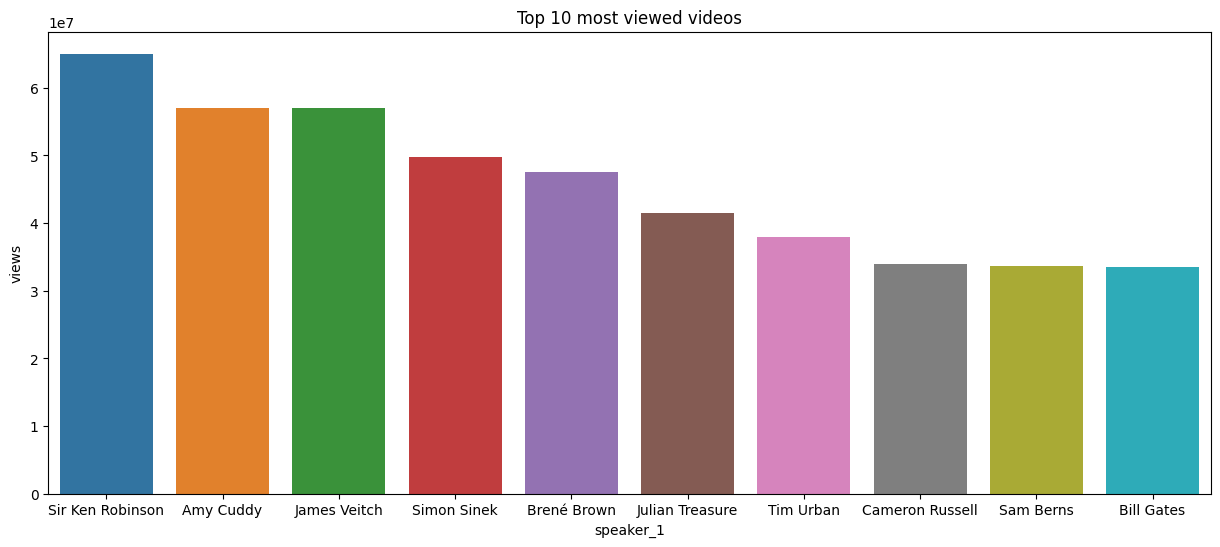

In [26]:
# Now let's visualize the above info

plt.figure(figsize = (15,6))
plt.title('Top 10 most viewed videos')
sns.barplot(data = mostViewedVideo, x = 'speaker_1', y = 'views')